In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\sb193\Downloads\heart.csv")

In [5]:
df.shape # Check number of columns and rows in data frame

(1025, 14)

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

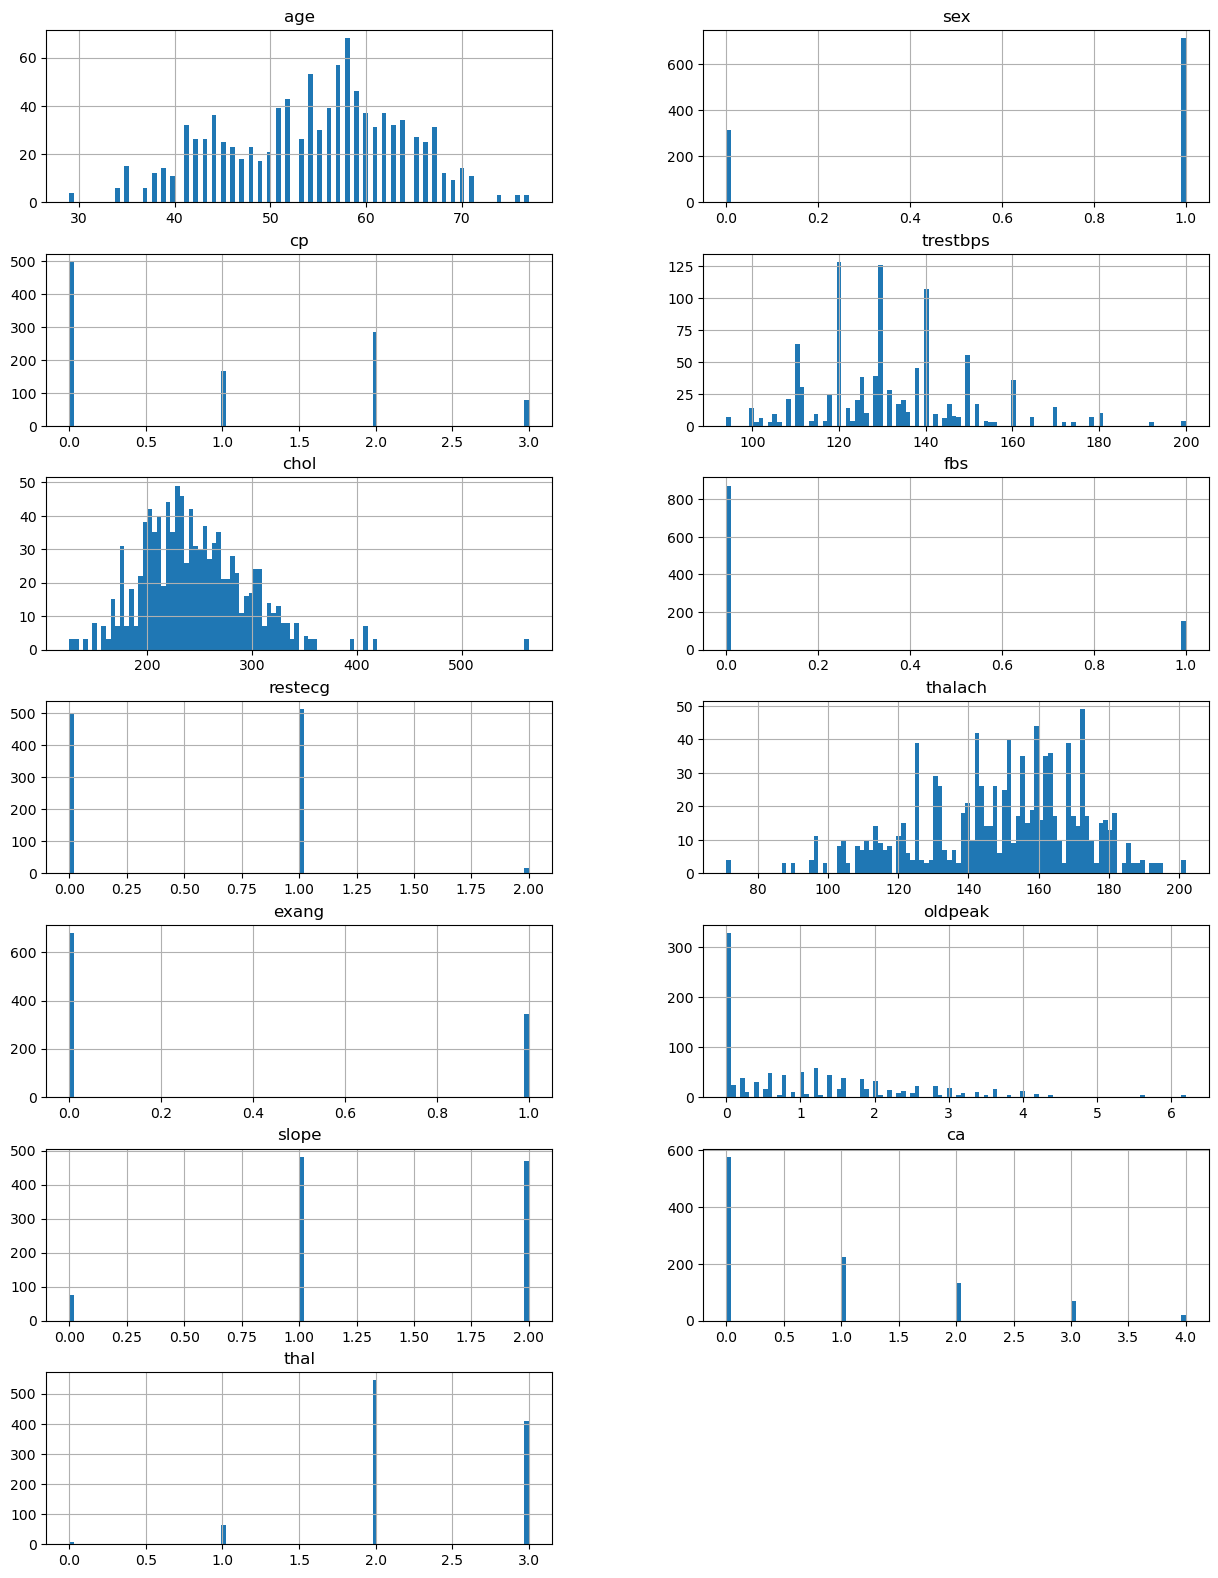

In [23]:
columns = list(df)[0:-1] # Excluding Outcome column which has only
df[columns].hist(stacked=False, bins=100, figsize=(15,40), layout=(14,2));
# Histogram of first 8 columns

In [27]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


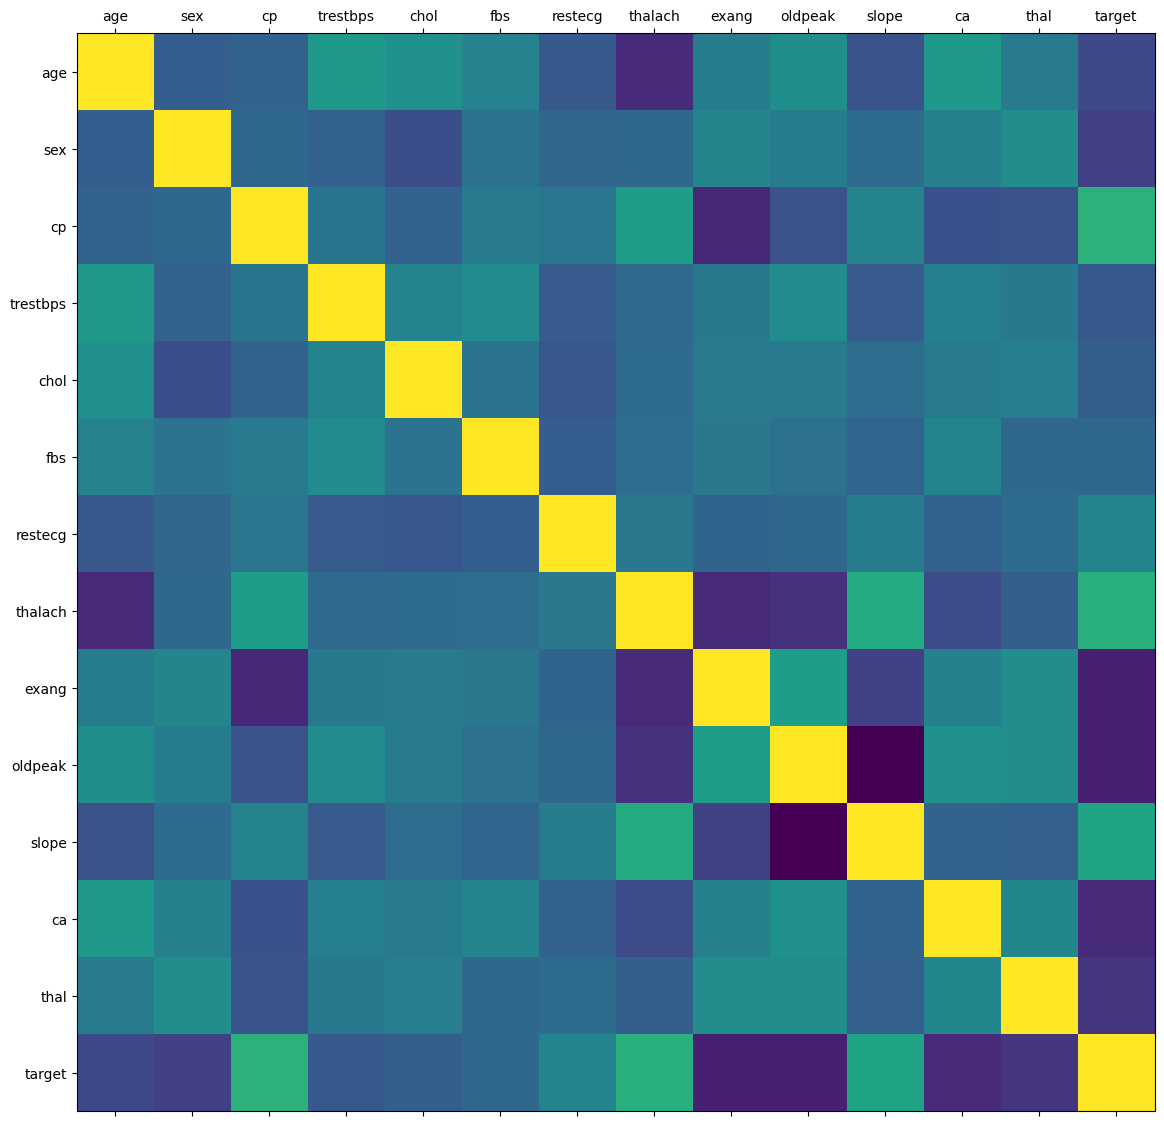

In [35]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=14):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
plot_corr(df)

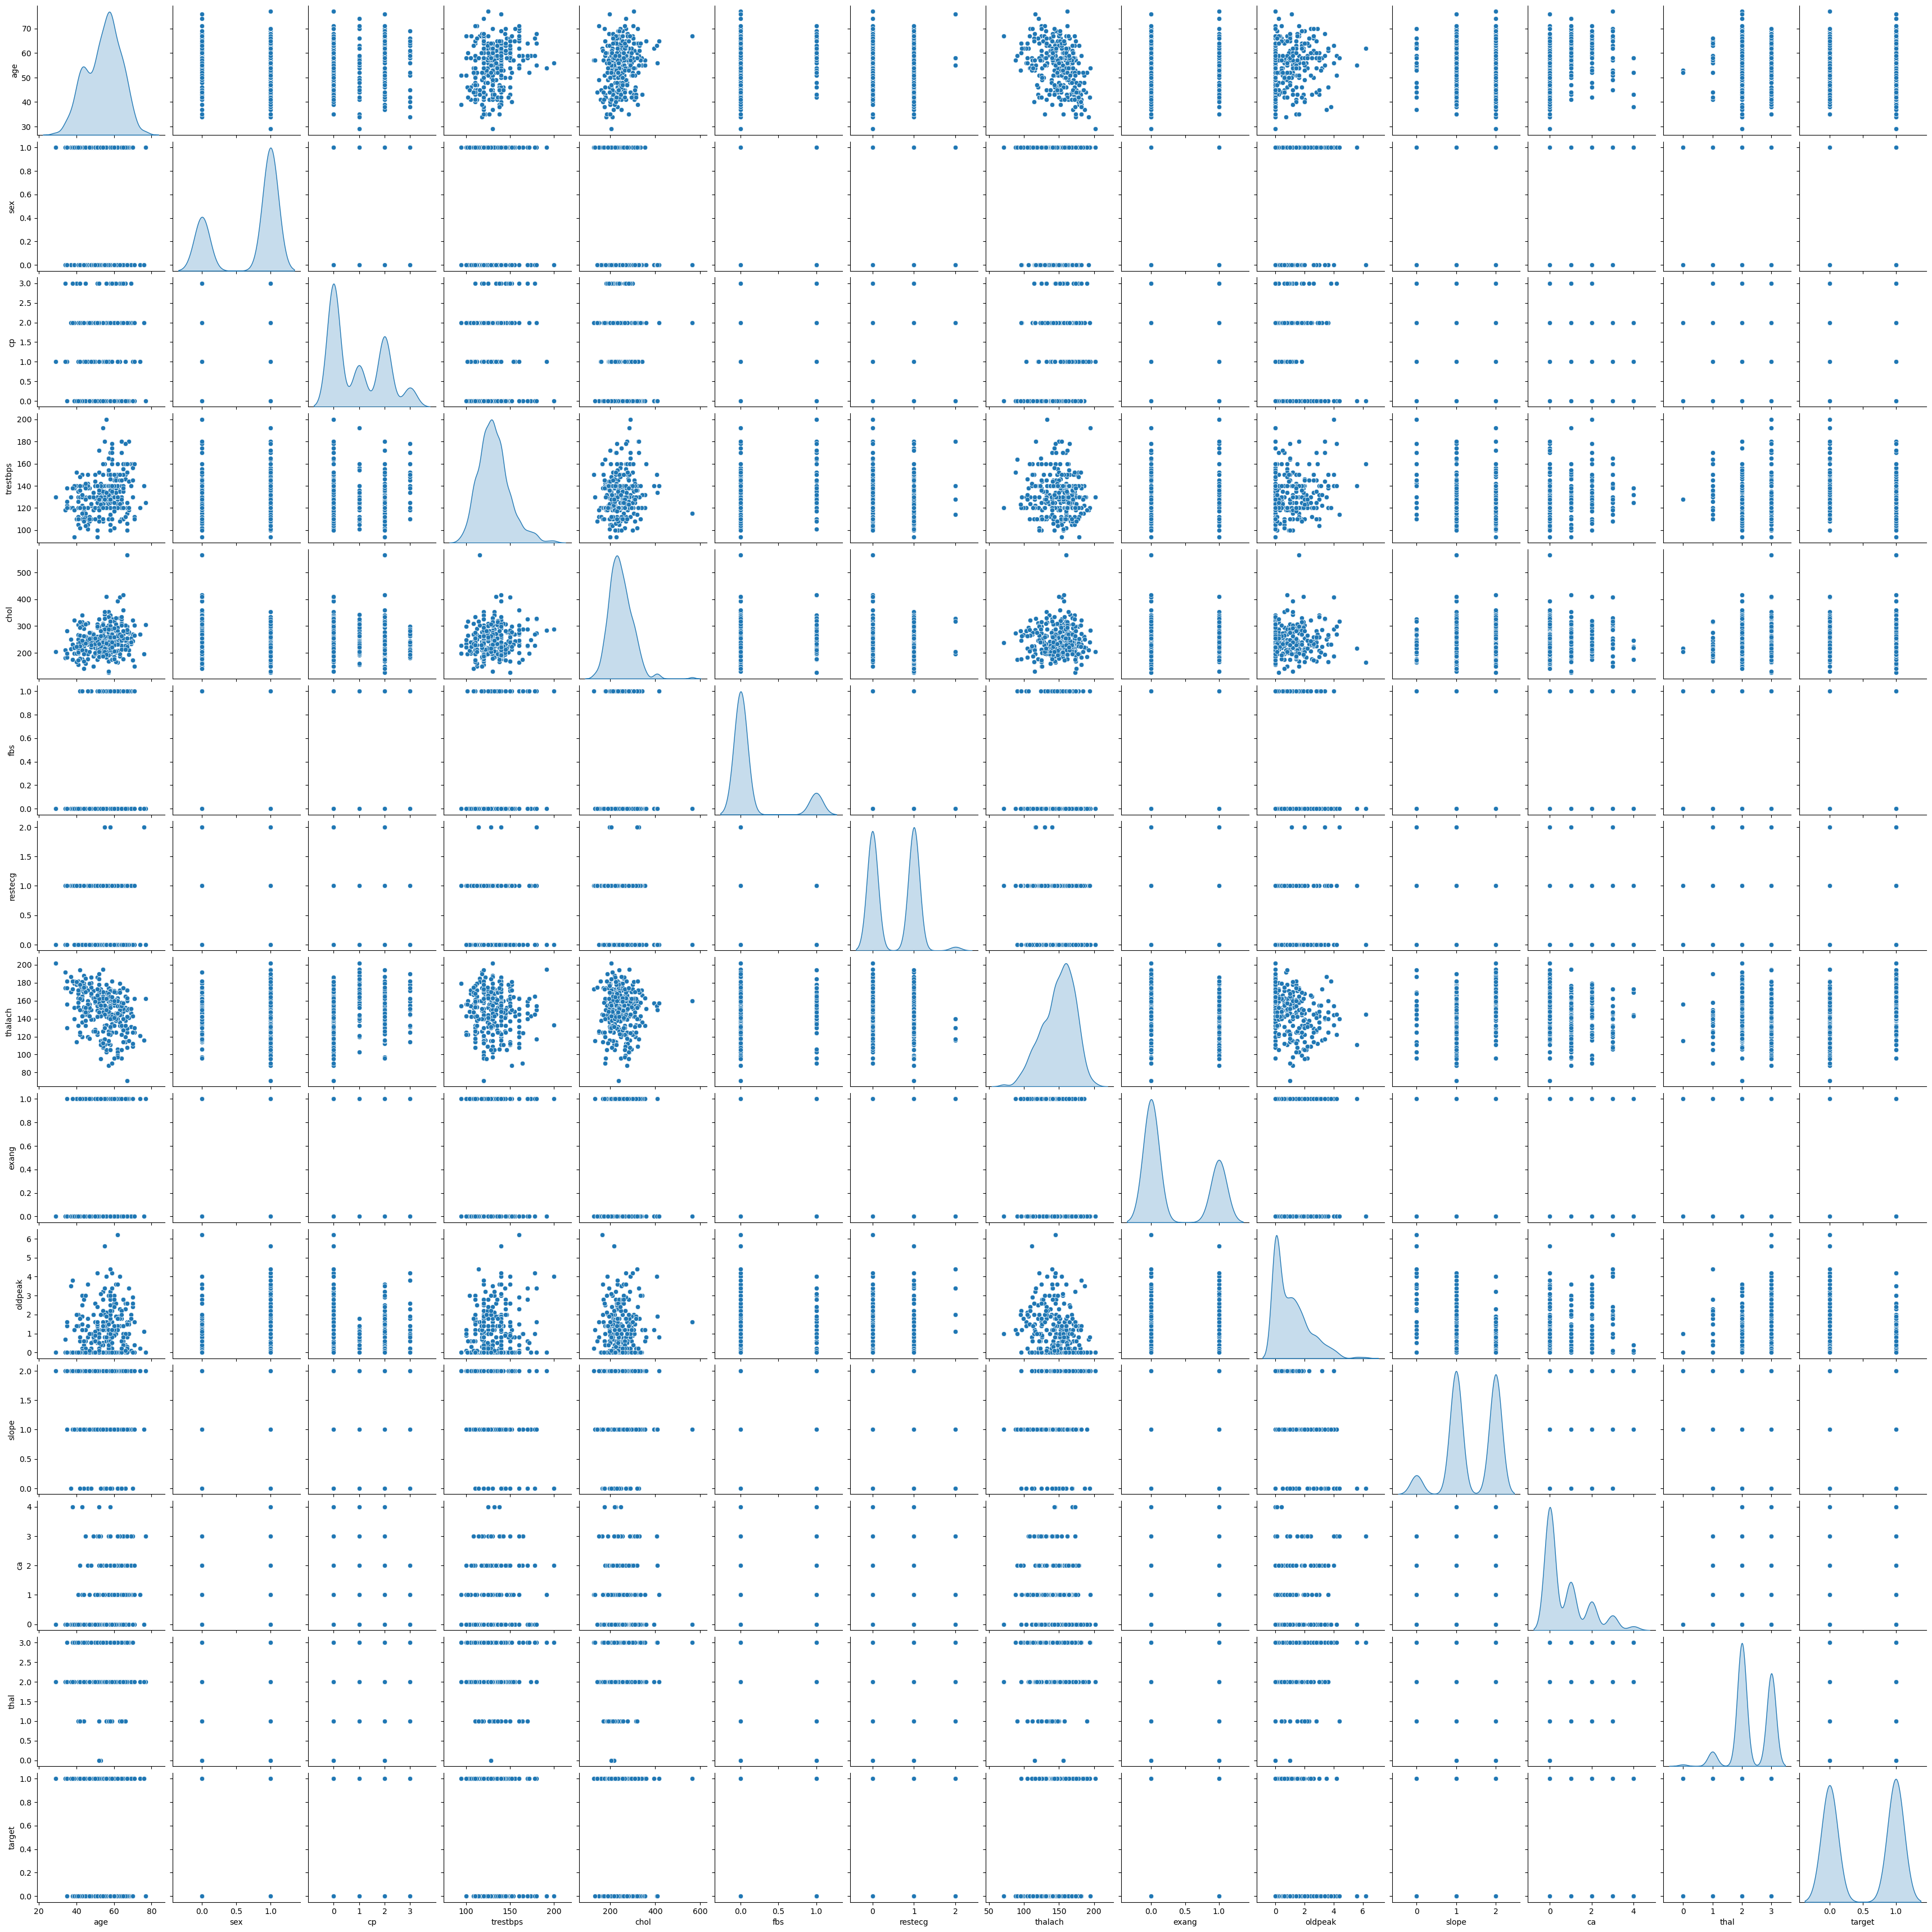

In [37]:
sns.pairplot(df,diag_kind='kde')

In [44]:
n_true = len(df.loc[df['target'] == True])
n_false = len(df.loc[df['target'] == False])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 526 (51.32%)
Number of false cases: 499 (48.68%)


So we have 34.90% people in current data set who have diabetes and rest of 65.10% doesn't have diabetes.

Its a good distribution True/False cases of diabetes in data.

In [49]:
from sklearn.model_selection import train_test_split

X = df.drop('target',axis=1)     # Predictor feature columns (8 X m)

Y = df['target']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
788,62,0,0,138,294,1,1,106,0,1.9,1,3,2
679,68,1,2,180,274,1,0,150,1,1.6,1,0,3
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2
366,58,1,2,112,230,0,0,165,0,2.5,1,1,3
345,66,1,1,160,246,0,1,120,1,0.0,1,3,1


Lets check split of data

In [56]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df.index)) * 100))

69.95% data is in training set
30.05% data is in test set


Now lets check diabetes True/False ratio in split data

In [63]:
print("Original Diabetes True Values    : {0} ({1:0.2f}%)".format(len(df.loc[df['target'] == 1]), (len(df.loc[df['target'] == 1])/len(df.index)) * 100))
print("Original Diabetes False Values   : {0} ({1:0.2f}%)".format(len(df.loc[df['target'] == 0]), (len(df.loc[df['target'] == 0])/len(df.index)) * 100))
print("")
print("Training Diabetes True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Diabetes False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Diabetes True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Diabetes False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Diabetes True Values    : 526 (51.32%)
Original Diabetes False Values   : 499 (48.68%)

Training Diabetes True Values    : 379 (52.86%)
Training Diabetes False Values   : 338 (47.14%)

Test Diabetes True Values        : 147 (47.73%)
Test Diabetes False Values       : 161 (52.27%)



# Data Preparation

### Check hidden missing values

As we checked missing values earlier but haven't got any. But there can be lots of entries with 0 values. We must need to take care of those as well.

In [66]:
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
788,62,0,0,138,294,1,1,106,0,1.9,1,3,2
679,68,1,2,180,274,1,0,150,1,1.6,1,0,3
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2
366,58,1,2,112,230,0,0,165,0,2.5,1,1,3
345,66,1,1,160,246,0,1,120,1,0.0,1,3,1


### Replace 0s with serial mean

In [68]:
#from sklearn.preprocessing import Imputer
#my_imputer = Imputer()
#data_with_imputed_values = my_imputer.fit_transform(original_data)

from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values=0, strategy="mean")
cols=x_train.columns
x_train = pd.DataFrame(rep_0.fit_transform(x_train))
x_test = pd.DataFrame(rep_0.fit_transform(x_test))

x_train.columns = cols
x_test.columns = cols

x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,62.0,1.0,1.77628,138.0,294.0,1.0,1.000000,106.0,1.0,1.900000,1.0,3.000000,2.0
1,68.0,1.0,2.00000,180.0,274.0,1.0,1.029333,150.0,1.0,1.600000,1.0,1.726384,3.0
2,66.0,1.0,2.00000,146.0,278.0,1.0,1.029333,152.0,1.0,1.548954,1.0,1.000000,2.0
3,58.0,1.0,2.00000,112.0,230.0,1.0,1.029333,165.0,1.0,2.500000,1.0,1.000000,3.0
4,66.0,1.0,1.00000,160.0,246.0,1.0,1.000000,120.0,1.0,1.548954,1.0,3.000000,1.0


In [75]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
diab_model = GaussianNB()

diab_model.fit(x_train, y_train.ravel())

C:\Users\sb193\AppData\Local\Temp\ipykernel_7304\407606542.py:6: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  diab_model.fit(x_train, y_train.ravel())


GaussianNB()

### Performance of our model with training data

In [77]:
diab_train_predict = diab_model.predict(x_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, diab_train_predict)))
print()

Model Accuracy: 0.7852



### Performance of our model with testing data

In [80]:
diab_test_predict = diab_model.predict(x_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, diab_test_predict)))
print()

Model Accuracy: 0.7208



### Lets check the confusion matrix and classification report

Confusion Matrix


<Axes: >

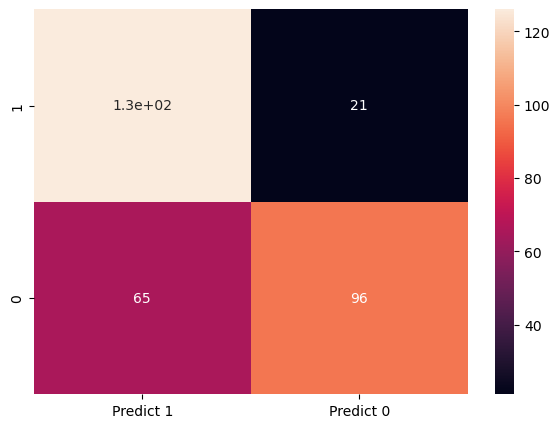

In [83]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, diab_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [85]:
print("Classification Report")
print(metrics.classification_report(y_test, diab_test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.66      0.86      0.75       147
           0       0.82      0.60      0.69       161

    accuracy                           0.72       308
   macro avg       0.74      0.73      0.72       308
weighted avg       0.74      0.72      0.72       308

